In [1310]:
# Initializing
# data processing. pandas as alias pd
import pandas as pd 
# linear algebra. numpy as alias np
import numpy as np 
# If you're working with a notebook, don't forget to use Matplotlib magic! 
%matplotlib inline
# matlab-style plotting
import matplotlib.pyplot as plt 
## ggplot
plt.style.use('ggplot')
import seaborn as sns
color = sns.color_palette()
# Set the Seaborn theme if desired
sns.set_style("darkgrid")
# ignore sklearn & seaborn warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
#for some statistics
from scipy import stats
from scipy.stats import norm, skew  #ex. sns(fit = norm)
# Format scientific notation from pandas aggregation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 


In [1358]:
# Where to save the figures
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "billboard"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img", CHAPTER_ID)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [1311]:
df90_10 = pd.read_csv('f90_10a.csv')

In [1312]:
df90_10 = df90_10.drop_duplicates(['unique'])

In [1313]:
df2010s = df90_10[df90_10['decade'] == '2010s']
df2010s = df2010s[df2010s['rank'] <= 10]

In [1314]:
df_pca = df2010s[['artist_x','title','acousticness','danceability','tempo','duration_ms','energy','loudness','mode','speechiness','instrumentalness','liveness','valence','key']]

In [1315]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 80394 to 120064
Data columns (total 14 columns):
artist_x            111 non-null object
title               111 non-null object
acousticness        111 non-null float64
danceability        111 non-null float64
tempo               111 non-null float64
duration_ms         111 non-null int64
energy              111 non-null float64
loudness            111 non-null float64
mode                111 non-null int64
speechiness         111 non-null float64
instrumentalness    111 non-null float64
liveness            111 non-null float64
valence             111 non-null float64
key                 111 non-null int64
dtypes: float64(9), int64(3), object(2)
memory usage: 13.0+ KB


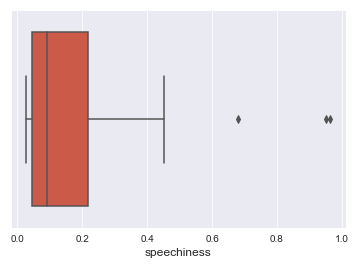

In [1316]:
ax = sns.boxplot(x=df_pca["speechiness"])

### Removing Outliers

In [1317]:
df_pca = df_pca[df_pca.acousticness <0.6]
df_pca = df_pca[df_pca.duration_ms <310000]
df_pca = df_pca[df_pca.duration_ms >110000]
df_pca = df_pca[df_pca.loudness > -12.5]
df_pca = df_pca[df_pca.speechiness < 0.5]

In [1318]:
df_pca['tempo'] = df_pca['tempo']*-1



In [1319]:
df_pca.duration_ms = df_pca['duration_ms']/df_pca['duration_ms'].max()

In [1320]:
df_pca.tempo = df_pca['tempo']/df_pca['tempo'].max()
df_pca['tempo'] = df_pca['tempo']*-1

Saving figure corrlationPlot


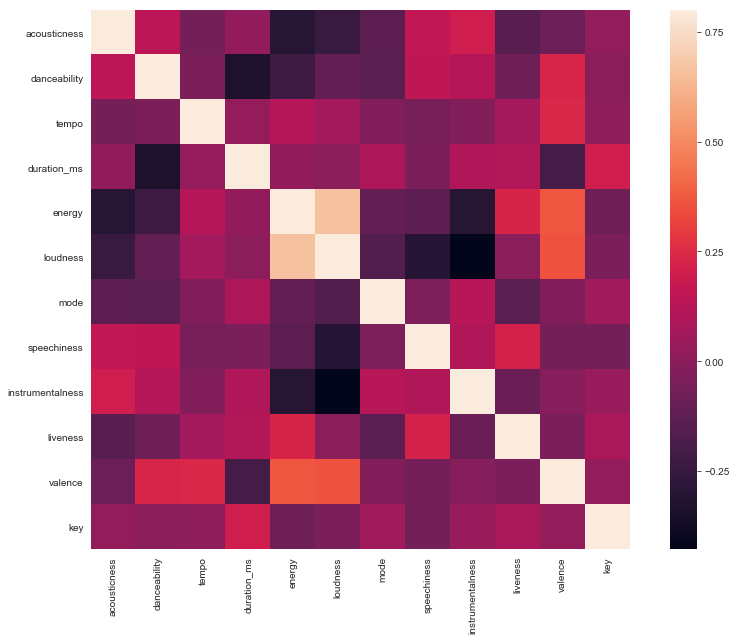

In [1369]:
corrmat = df_pca.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8,square=True)
save_fig("corrlationPlot")

In [ ]:
for i, col in enumerate(df_pca.select_dtypes(exclude=['object']).columns):
    plt.figure(i)
    ax = sns.distplot(df_pca[col])
    plt.show()

In [1323]:
df_pca.describe()

,acousticness,danceability,tempo,duration_ms,energy,loudness,mode,speechiness,instrumentalness,liveness,valence,key
count,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000
mean,0.110,0.671,-1.835,0.742,0.707,-5.570,0.634,0.133,0.002,0.192,0.502,4.301
std,0.138,0.128,0.422,0.109,0.147,2.039,0.484,0.111,0.013,0.141,0.211,3.685
min,0.000,0.364,-2.920,0.494,0.317,-11.556,0.000,0.026,0.000,0.036,0.056,0.000
25%,0.023,0.594,-2.124,0.658,0.621,-6.484,0.000,0.046,0.000,0.100,0.354,1.000
50%,0.059,0.660,-1.861,0.739,0.722,-5.369,1.000,0.090,0.000,0.136,0.486,3.000
75%,0.117,0.745,-1.492,0.803,0.819,-4.273,1.000,0.176,0.000,0.246,0.645,7.000
max,0.592,0.931,-1.000,1.000,0.954,-1.190,1.000,0.433,0.093,0.956,0.943,11.000


In [1324]:
from sklearn.decomposition import PCA
pca = PCA()

In [1325]:
dan_speech = df_pca[['danceability','speechiness','tempo']]

In [1326]:
pca.set_params(n_components = 1)
pca.fit(dan_speech)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1327]:
pca.components_

array([[ 0.01417758,  0.01544498, -0.9997802 ]])

In [1328]:
dan_speech.describe()

,danceability,speechiness,tempo
count,93.000,93.000,93.000
mean,0.671,0.133,-1.835
std,0.128,0.111,0.422
min,0.364,0.026,-2.920
25%,0.594,0.046,-2.124
50%,0.660,0.090,-1.861
75%,0.745,0.176,-1.492
max,0.931,0.433,-1.000


In [1329]:
pca.explained_variance_ratio_ # percentage of variance explained by each selected components

array([0.86099941])

In [1330]:
pca.mean_ # The average of each features

array([ 0.67088172,  0.13335914, -1.83486114])

In [1331]:
a = pca.transform(dan_speech)


In [1332]:
# # a = a[:,0]
# ax = sns.scatterplot(x=df_pca['valence'], y=a)

In [1333]:
inMatrix = np.concatenate((df_pca[['artist_x','title','acousticness','danceability','speechiness','tempo','mode','valence','energy','key']], a), axis=1)
df1 = pd.DataFrame(inMatrix)
df1.columns = ['artist','title','acousticness','danceability','speechiness','tempo','mode','valence','energy','key','pc1']


In [1334]:
#Key dictionary
keys = {0:'C', 1:'C#/Db', 2:'D', 3:'D#/Eb', 4:'E', 5:'F', 6:'F#/Gb', 7:'G', 8:'G#/Ab', 9:'A', 10:'A#/Bb', 11:'B', 12:'C'}

In [1335]:
df1['key_eng'] = df1.key
df1 = df1.replace({"key_eng": keys})

In [1336]:
df1["key_title"] = df1["key_eng"] + df1["mode"].map(str)+ df1["title"]

In [1337]:
df1.shape

(93, 13)

In [1338]:
df1['pc1'] = df1['pc1']

In [1339]:
df1['sum'] = df1['pc1'] + df1['energy'] + df1['valence']

In [1340]:
df1 = df1.sort_values(by=['sum'])
df1 = df1.sort_values(by=['key'])

In [1341]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
plotly.tools.set_credentials_file(username='choym92', api_key='Myh5ZJdHwzntkeXmtD4k')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
df=df1


data = []
clusters = []
colors = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, 93)]


    
for i in range(len(df['title'])):
    name = df['key_title'][i]
    color = colors[i]
    x = df[ df['key_title'] == name ]['energy']
    y = df[ df['key_title'] == name ]['valence']
    z = df[ df['key_title'] == name ]['pc1']

    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        
        marker = dict(size=4, color=color, line=dict(width=0), opacity=0.7 ) )
    data.append( trace )

layout = dict(
    width=1000,
    height=750,
    autosize=True,
    title="PCA Analysis",
    scene=dict(
        xaxis=dict(
            title='Energy',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title='Valence',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title='PC1',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
showlegend = False,
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='3d', validate=False)


In [1342]:
a=df1[df1.key_eng == 'G'][['energy','valence','pc1']]
b=df1[['energy','valence','pc1']]
#using looping


In [1343]:
df1

,artist,title,acousticness,danceability,speechiness,tempo,mode,valence,energy,key,pc1,key_eng,key_title,sum
55,Katy Perry Featuring Skip Marley,Chained To The Rhythm,0.081,0.446,0.174,-2.920,1,0.474,0.800,0,1.083,C,C1Chained To The Rhythm,2.357
40,One Direction,Drag Me Down,0.109,0.730,0.037,-2.124,0,0.595,0.703,0,0.288,C,C0Drag Me Down,1.586
42,Justin Bieber,Sorry,0.086,0.605,0.048,-1.541,0,0.414,0.768,0,-0.296,C,C0Sorry,0.886
20,Snoop Dogg & Wiz Khalifa Featuring Bruno Mars,"Young, Wild & Free",0.090,0.553,0.206,-1.453,1,0.551,0.652,0,-0.382,C,"C1Young, Wild & Free",0.821
3,Katy Perry Featuring Snoop Dogg,California Gurls,0.004,0.791,0.057,-1.923,1,0.425,0.754,0,0.088,C,C1California Gurls,1.267
25,Phillip Phillips,Home,0.023,0.605,0.030,-1.861,1,0.371,0.812,0,0.024,C,C1Home,1.207
2,Eminem,Not Afraid,0.529,0.855,0.264,-1.763,0,0.668,0.954,0,-0.067,C,C0Not Afraid,1.555
10,Glee Cast,Teenage Dream,0.227,0.575,0.054,-1.846,0,0.397,0.864,0,0.008,C,C0Teenage Dream,1.269
12,Britney Spears,Hold It Against Me,0.010,0.648,0.043,-2.045,0,0.389,0.722,0,0.208,C,C0Hold It Against Me,1.319
72,J. Cole,KOD,0.210,0.831,0.150,-2.182,1,0.199,0.782,0,0.349,C,C1KOD,1.330


In [1304]:
df1[df1.key == 5]

,artist,title,acousticness,danceability,speechiness,tempo,mode,valence,energy,key,pc1,key_eng,key_title,sum
91,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored",0.042,0.726,0.092,-2.614,0,0.335,0.554,5,0.780,F,"F0Break Up With Your Girlfriend, I'm Bored",1.669
39,Selena Gomez Featuring A$AP Rocky,Good For You,0.181,0.607,0.061,-1.368,0,0.215,0.673,5,-0.469,F,F0Good For You,0.419
48,Beyonce,Formation,0.024,0.677,0.433,-1.875,0,0.419,0.871,5,0.045,F,F0Formation,1.335
43,Adele,Hello,0.336,0.481,0.035,-2.429,0,0.289,0.451,5,0.590,F,F0Hello,1.330
24,Katy Perry,Part Of Me,0.000,0.678,0.035,-2.000,1,0.769,0.918,5,0.163,F,F1Part Of Me,1.850
0,Justin Bieber Featuring Ludacris,Baby,0.054,0.656,0.232,-1.000,0,0.522,0.841,5,-0.833,F,F0Baby,0.530
71,"Cardi B, Bad Bunny & J Balvin",I Like It,0.099,0.816,0.129,-2.092,0,0.650,0.726,5,0.259,F,F0I Like It,1.635
63,Post Malone Featuring 21 Savage,Rockstar,0.117,0.587,0.090,-2.458,0,0.140,0.535,5,0.621,F,F0Rockstar,1.296
30,Ariana Grande Featuring Mac Miller,The Way,0.325,0.644,0.147,-1.269,0,0.830,0.879,5,-0.566,F,F0The Way,1.143


In [1344]:
playlist0 = df1.loc[df1['title'].isin(['Chained To The Rhythm', 'Mine', 'No Tears Left To Cry','Part Of Me'])]

In [1349]:
#swapping rows
b, c = playlist0.loc[6].copy(), playlist0.loc[73].copy()
playlist0.loc[6],playlist0.loc[73] = c,b

In [1381]:
#swapping rows
b, c = playlist0.loc[73].copy(), playlist0.loc[24].copy()
playlist0.loc[73],playlist0.loc[24] = c,b

In [1382]:
playlist0

,artist,title,acousticness,danceability,speechiness,tempo,mode,valence,energy,key,pc1,key_eng,key_title,sum
55,Katy Perry Featuring Skip Marley,Chained To The Rhythm,0.081,0.446,0.174,-2.920,1,0.474,0.800,0,1.083,C,C1Chained To The Rhythm,2.357
24,Taylor Swift,Mine,0.003,0.621,0.030,-1.861,1,0.670,0.779,7,0.024,G,G1Mine,1.473
6,Ariana Grande,No Tears Left To Cry,0.040,0.699,0.059,-1.876,0,0.354,0.713,9,0.041,A,A0No Tears Left To Cry,1.108
73,Katy Perry,Part Of Me,0.000,0.678,0.035,-2.000,1,0.769,0.918,5,0.163,F,F1Part Of Me,1.850


Saving figure Playlist


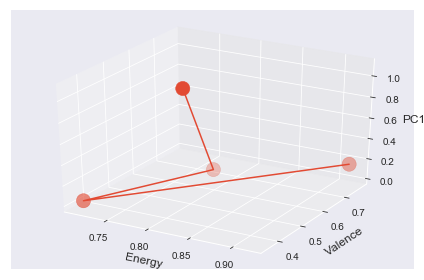

In [1383]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x = playlist0['energy']
y = playlist0['valence']
z = playlist0['pc1']
a = []
b = []
c = []
for item in x:
    a.append(float(item))
for item in y:
    b.append(float(item))
for item in z:
    c.append(float(item))

r = np.array(a)
s = np.array(b)
t = np.array(c)

ax.set_xlabel("Energy")
ax.set_ylabel("Valence")
ax.set_zlabel("PC1")


ax.scatter(r,s,zs = t, s=200)
ax.plot3D(r,s,z)
save_fig("Playlist")

In [1379]:
g = playlist0.copy()

In [1380]:
g.drop(['key_title'], axis=1)

,artist,title,acousticness,danceability,speechiness,tempo,mode,valence,energy,key,pc1,key_eng,sum
55,Katy Perry Featuring Skip Marley,Chained To The Rhythm,0.081,0.446,0.174,-2.920,1,0.474,0.800,0,1.083,C,2.357
24,Katy Perry,Part Of Me,0.000,0.678,0.035,-2.000,1,0.769,0.918,5,0.163,F,1.850
6,Ariana Grande,No Tears Left To Cry,0.040,0.699,0.059,-1.876,0,0.354,0.713,9,0.041,A,1.108
73,Taylor Swift,Mine,0.003,0.621,0.030,-1.861,1,0.670,0.779,7,0.024,G,1.473


In [1093]:
pca = PCA()
energy_loud = df_pca[['energy','loudness']]
pca.set_params(n_components = 1)
pca.fit(energy_loud)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1094]:
pca.components_

array([[-0.04792957, -0.99885072]])

In [1095]:
pca.explained_variance_ratio_ # percentage of variance explained by each selected components

array([0.99708571])

In [1096]:
pca.mean_ # The average of each features

array([ 0.7067957 , -5.57030108])

In [1097]:
b = pca.transform(energy_loud)

In [1105]:
inMatrix = np.concatenate((df_pca[['artist_x','title','acousticness','danceability','speechiness','tempo','mode','valence','energy','loudness','key']], a,b), axis=1)
df1 = pd.DataFrame(inMatrix)
df1.columns = ['artist','title','acousticness','danceability','speechiness','tempo','mode','valence','energy','loudness','key','pc1','pc2']


In [1102]:
df['pc2'] = df['pc2'] * -1

In [1106]:
df1.head(10)

,artist,title,acousticness,danceability,speechiness,tempo,mode,valence,energy,loudness,key,pc1,pc2
0,Justin Bieber Featuring Ludacris,Baby,0.054,0.656,0.232,-1.000,0,0.522,0.841,-5.183,5,-0.833,-0.393
1,3OH!3 Featuring Ke$ha,My First Kiss,0.006,0.682,0.080,-2.123,1,0.827,0.889,-4.166,0,0.287,-1.411
2,Eminem,Not Afraid,0.529,0.855,0.264,-1.763,0,0.668,0.954,-1.190,0,-0.067,-4.387
3,Katy Perry Featuring Snoop Dogg,California Gurls,0.004,0.791,0.057,-1.923,1,0.425,0.754,-3.729,0,0.088,-1.841
4,Miley Cyrus,Can't Be Tamed,0.036,0.637,0.143,-1.799,1,0.793,0.919,-2.842,7,-0.036,-2.735
5,Eminem Featuring Rihanna,Love The Way You Lie,0.241,0.749,0.227,-1.338,1,0.641,0.925,-5.034,10,-0.494,-0.546
6,Taylor Swift,Mine,0.003,0.621,0.030,-1.861,1,0.670,0.779,-2.943,7,0.024,-2.628
7,Lil Wayne Featuring Drake,Right Above It,0.043,0.376,0.356,-1.170,0,0.463,0.841,-4.348,3,-0.666,-1.227
8,Taylor Swift,Speak Now,0.099,0.712,0.030,-1.830,1,0.714,0.603,-3.753,7,-0.006,-1.810
9,Taylor Swift,Back To December,0.117,0.529,0.030,-2.182,1,0.286,0.670,-4.663,2,0.344,-0.904


In [1104]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
plotly.tools.set_credentials_file(username='choym92', api_key='Myh5ZJdHwzntkeXmtD4k')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
df=df1.head(10)


data = []
clusters = []
colors = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, 12)]


    
for i in range(len(df['key'])):
    name = df['title'].unique()[i]
    color = colors[i]
    x = df[ df['title'] == name ]['pc2']
    y = df[ df['title'] == name ]['pc1']
    z = df[ df['title'] == name ]['valence']

    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        
        marker = dict(size=4, color=color, line=dict(width=0), opacity=0.7 ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=True,
    title="PCA Analysis",
    scene=dict(
        xaxis=dict(
            title='PC2(Energy&Loudness)',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title='PC1(Danceability&Speech&Tempo)',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title='Valence',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
showlegend = False,
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='3d', validate=False)
